IMPORTING REQUIRED LIBRARIES

In [1]:
import pandas as pd              # for data manipulation 
import numpy as np               # for numerical calculation
import matplotlib.pyplot as plt  # for data visulization
import seaborn as sns            # for advanced data visualization
from sklearn import metrics      #for matcine learning algorithms
from scipy import stats          # for scientific calculations

In [ ]:
READING RED WINE AND WHITE WINE DATA  

In [2]:
#loading red wine data
data1 = pd.read_csv("C:\\Users\\Manikanta Marreddy\\Desktop\\winequality\\New folder\\winequality-red.csv",sep=';')
data1['wine_type'] = 1   #creating another column for red wine and placing 1
data1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
 12  wine_type             1599 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 162.5 KB


In [3]:
#loading white wine data set
data2 = pd.read_csv("C:\\Users\\Manikanta Marreddy\\Desktop\\winequality\\New folder\\winequality-white.csv",sep=';')
data2['wine_type'] = 2    #creating another column for red wine and placing 2
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
 12  wine_type             4898 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 497.6 KB


CONCATING RED WINE AND WHITE WINE DATA SETS

In [4]:
p = [data1,data2]
data = pd.concat(p)  #using concat
#data.head()

In [5]:
print(data.shape)

data = data.iloc[ :,[12,0,1,2,3,4,5,6,7,8,9,10,11]]
data.head()

(6497, 13)


,wine_type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,1,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,1,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
# checking for null valued
data.isnull().sum()

wine_type               0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
data.describe()

,wine_type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,1.753886,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,0.430779,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,1.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,2.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,2.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,2.000000,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,2.000000,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [40]:
#storing the combined data file into hard disk
data.to_csv('combined.csv',index=False, encoding='utf-8-sig')
import os
os.getcwd()   #to get current working directory


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   wine_type             6497 non-null   int64  
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB


'c:\\Users\\Manikanta Marreddy\\Desktop\\project\\Prediction-using-Supervised-ML-main'

IDENTIFYING THE OUTLIERS IN DATA USING BOX PLOT

C:\Users\Manikanta Marreddy\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='residual sugar'>

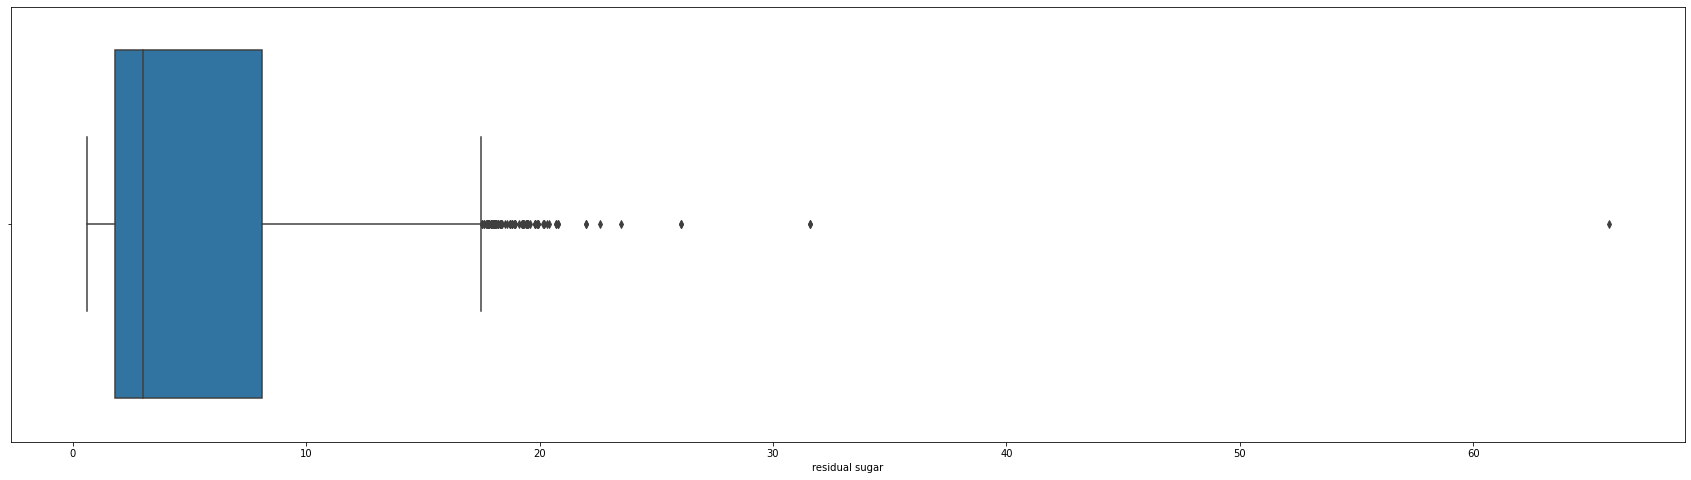

In [8]:
plt.figure(figsize=(30,8))
sns.boxplot(data['residual sugar'])  #using boxplot

In [9]:
# remove outliers from the data using z-score function 
z = np.abs(stats.zscore(data))
data = data[(z<3).all(axis = 1)]    #removing extreme outlers only (z<3)
data.shape

(5989, 13)

by using heatmap we are checking input variables are relevent or not.

<AxesSubplot:>

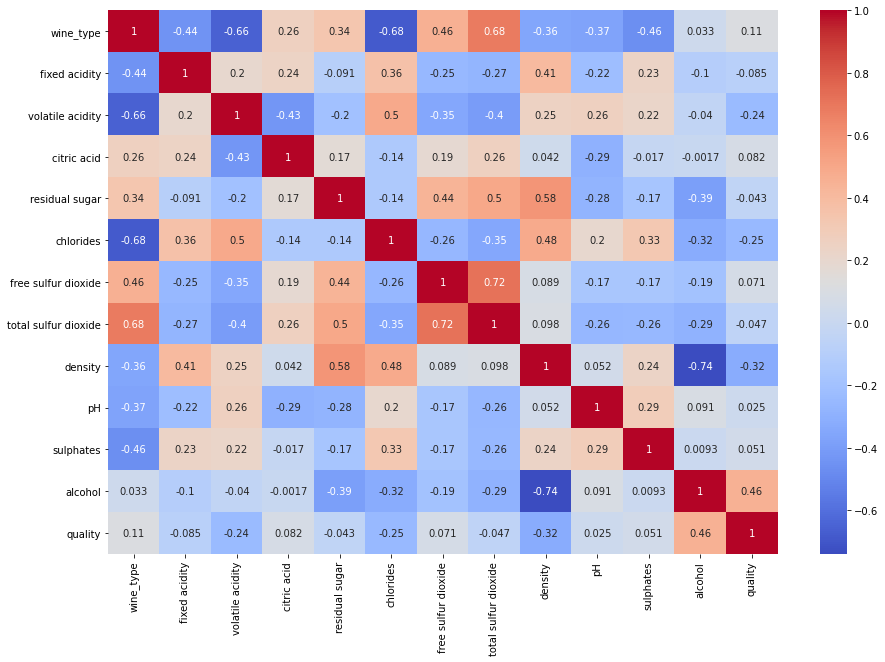

In [10]:
plt.subplots(figsize = (15,10))
sns.heatmap(data.corr(),annot =True,cmap='coolwarm')  #using correlation coefficient 

#by observing the heat map we can say that almost all input variables are strongly correlated with target variable. 
#by using feature selection (backward method) 

In [44]:
# checking the class imbalance
(data['quality'].value_counts()/(data.shape[0]))*100

6    44.014026
5    32.693271
7    17.148105
4     3.072299
8     3.072299
Name: quality, dtype: float64

DATA PREPROCESSING

In [13]:
#splitting the data(variables) in to input and target variables
x = np.asarray(data.iloc[:,:-1])

y = np.asarray(data['quality'])

# x = data.drop('quality',1)
# y = data['quality']


feature selection 

In [74]:
#Adding constant column of ones, mandatory for sm.OLS model
import statsmodels.api as sm
#import python-constraint 
X_1 = sm.tools.tools.add_constant(x)
#Fitting sm.OLS model
model = sm.OLS(y,X_1).fit()
model.pvalues

# here all variables are stronly correlated to target variable(quality).

array([7.60740359e-15, 5.83755920e-11, 1.05149694e-10, 7.42556202e-55,
       7.88615882e-02, 2.85692040e-26, 4.64133356e-01, 3.41933578e-15,
       3.22404020e-04, 1.83716702e-14, 1.10124460e-11, 1.03607162e-20,
       2.81171376e-18])

In [23]:
# standardizing the data set
from sklearn import preprocessing
x = preprocessing.StandardScaler().fit(x).transform(x)


In [24]:
#splitting the data into training and testing data sets
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=0)
print('training dataset :' ,x_train.shape ,y_train.shape)

print('testing dataset :' ,x_test.shape ,y_test.shape)


training dataset : (4791, 12) (4791,)
testing dataset : (1198, 12) (1198,)


VALIDATION AND MODEL SELECTION

Text(0, 0.5, 'Cross-validated accuracy')

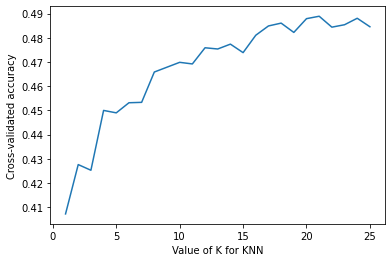

In [25]:
#KNN MODEL

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
# Number of k from 1 to 26
k_range = range(1, 26)
k_scores= []
# Calculate cross validation score for every k number from 1 to 26
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x, y, cv=10, scoring='accuracy') 
    k_scores.append(scores.mean())
# It’s 10 fold cross validation with ‘accuracy’ scoring 


%matplotlib inline
# Plot accuracy for every k number between 1 and 26
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-validated accuracy')

In [26]:
# Train the model and predict for k=19
knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
# classification report for test set
print(metrics.classification_report(y_test, y_pred, digits=3, zero_division = 1))
# Calculate cv score with 'accuracy' scoring and 10 folds
accuracy = cross_val_score(knn, x, y, scoring = 'accuracy',cv=10)
print('cross validation score',accuracy.mean())
# Calculate cv score with 'roc_auc_ovr' scoring and 10 folds
accuracy = cross_val_score(knn, x, y, scoring = 'roc_auc_ovr',cv=10)
print('cross validation score with roc_auc',accuracy.mean())
# Calculate roc_auc score with multiclass parameter
print('roc_auc_score',roc_auc_score(y_test,knn.predict_proba(x_test), multi_class='ovr'))

              precision    recall  f1-score   support

           4      0.333     0.029     0.053        35
           5      0.616     0.650     0.632       377
           6      0.589     0.680     0.631       543
           7      0.515     0.429     0.468       203
           8      0.000     0.000     0.000        40

    accuracy                          0.586      1198
   macro avg      0.411     0.357     0.357      1198
weighted avg      0.558     0.586     0.566      1198

cross validation score 0.4822192505904489
cross validation score with roc_auc 0.6975580970843452
roc_auc_score 0.7992712914875132


In [27]:
#LOISTIC REGRESSION MODEL

from sklearn.linear_model import LogisticRegression
# Train and fit model
logreg = LogisticRegression(multi_class='multinomial',solver ='newton-cg')
logreg.fit(x_train, y_train)
# Predict out-of-sample test set
y_pred = logreg.predict(x_test)
# classification report
print(metrics.classification_report(y_test, y_pred, digits=3, zero_division = 1))
print('accuracy',accuracy_score(y_test, y_pred))
# Calculate cv score with ‘roc_auc_ovr’ scoring and 10 folds
accuracy = cross_val_score(logreg, x, y, scoring = 'roc_auc_ovr',cv=10)
print('cross validation score with roc_auc',accuracy.mean())
# Calculate roc_auc score with multiclass parameter
print('roc_auc_score',roc_auc_score(y_test,logreg.predict_proba(x_test), multi_class='ovr'))

              precision    recall  f1-score   support

           4      0.500     0.029     0.054        35
           5      0.582     0.650     0.614       377
           6      0.549     0.687     0.610       543
           7      0.510     0.241     0.328       203
           8      1.000     0.000     0.000        40

    accuracy                          0.558      1198
   macro avg      0.628     0.321     0.321      1198
weighted avg      0.567     0.558     0.527      1198

accuracy 0.5575959933222037
cross validation score with roc_auc 0.7506892285656838
roc_auc_score 0.7651649237431469


In [28]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
# Add polynomial features to the logistic regression model
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
    LogisticRegression(multi_class='multinomial',solver ='newton-cg', **kwargs))

In [29]:
# Train and fit the 3rd degree polynomial regression model
poly = PolynomialRegression(3)
poly.fit(x_train,y_train)
# Test out-of-sample test set
y_pred = poly.predict(x_test)
# Classification report
print(metrics.classification_report(y_test, y_pred, digits=3))
# Calculate cv score with 'roc_auc_ovr' scoring and 10 folds
accuracy = cross_val_score(poly, x, y, scoring = 'roc_auc_ovr',cv=10)
print('cross validation score with roc_auc_ovr scoring',accuracy.mean())
# Calculate roc_auc score with multiclass parameter
print('roc_auc_score',roc_auc_score(y_test,poly.predict_proba(x_test), multi_class='ovr'))

              precision    recall  f1-score   support

           4      0.250     0.086     0.128        35
           5      0.591     0.613     0.602       377
           6      0.559     0.610     0.583       543
           7      0.494     0.419     0.453       203
           8      0.419     0.325     0.366        40

    accuracy                          0.553      1198
   macro avg      0.463     0.410     0.426      1198
weighted avg      0.544     0.553     0.546      1198

cross validation score with roc_auc_ovr scoring 0.6953083890028516
roc_auc_score 0.7822519328531152


In [31]:
from sklearn.tree import DecisionTreeClassifier
# Train and fit the Decision Tree Classification model
tree = DecisionTreeClassifier(random_state=0)
tree.fit(x_train, y_train)
# Evaluate the model with out-of-sample test set
y_pred = tree.predict(x_test)
# Classification report
print(metrics.classification_report(y_test, y_pred.round(), digits=3))
# Calculate cv score with ‘roc_auc_ovr’ scoring and 10 folds
accuracy = cross_val_score(tree, x, y,scoring = 'roc_auc_ovr',cv=10)
print('cross validation score with roc_auc_ovr scoring',accuracy.mean())
# Calculate roc_auc score with multiclass parameter
print('roc_auc_score',roc_auc_score(y_test,tree.predict_proba(x_test), multi_class='ovr'))


              precision    recall  f1-score   support

           4      0.333     0.229     0.271        35
           5      0.639     0.645     0.642       377
           6      0.634     0.615     0.624       543
           7      0.535     0.571     0.552       203
           8      0.420     0.525     0.467        40

    accuracy                          0.603      1198
   macro avg      0.512     0.517     0.511      1198
weighted avg      0.603     0.603     0.602      1198

cross validation score with roc_auc_ovr scoring 0.5505786227086912
roc_auc_score 0.6982829224442457


In [32]:
from sklearn.ensemble import RandomForestClassifier
# Train and fit the Random Forest Classification model
forest = RandomForestClassifier(n_estimators=100,random_state = 0)
forest.fit(x_train, y_train)
# Test out-of-sample test set
y_pred = forest.predict(x_test)
# Classification report
print(metrics.classification_report(y_test, y_pred.round(), digits=3))
# Calculate cv score with 'roc_auc_ovr' scoring and 10 folds
accuracy = cross_val_score(forest, x, y,scoring = 'roc_auc_ovr',cv=10)
print('cross validation score with roc_auc_ovr scoring',accuracy.mean())
# Calculate roc_auc score with multiclass parameter
print('roc_auc_score',roc_auc_score(y_test,forest.predict_proba(x_test), multi_class='ovr'))


              precision    recall  f1-score   support

           4      1.000     0.143     0.250        35
           5      0.731     0.727     0.729       377
           6      0.651     0.775     0.708       543
           7      0.693     0.512     0.589       203
           8      0.857     0.450     0.590        40

    accuracy                          0.686      1198
   macro avg      0.786     0.521     0.573      1198
weighted avg      0.700     0.686     0.677      1198

cross validation score with roc_auc_ovr scoring 0.7392343125072626
roc_auc_score 0.8671299619547327


In [33]:
# Import SMOTE module
from imblearn.over_sampling import SMOTE
# Create model and fit the training set to create a new training set
sm = SMOTE(random_state = 2) 
x_train_res, y_train_res = sm.fit_resample(x_train, y_train.ravel())
# Create random forest model
forest = RandomForestClassifier(n_estimators=100,random_state = 0)
# Fit the model to the new train set
forest.fit(x_train_res, y_train_res.ravel())
# # Test out-of-sample test set
y_pred = forest.predict(x_test)
# Classification report
print(metrics.classification_report(y_test, y_pred.round(), digits=3))
# Calculate cv score with 'roc_auc_ovr' scoring and 10 folds
accuracy = cross_val_score(forest, x, y,scoring = 'roc_auc_ovr',cv=10)
print('cross validation score with roc_auc_ovr scoring',accuracy.mean())
# Calculate roc_auc score with multiclass parameter
print('roc_auc_score',roc_auc_score(y_test,forest.predict_proba(x_test), multi_class='ovr'))

              precision    recall  f1-score   support

           4      0.406     0.371     0.388        35
           5      0.730     0.753     0.742       377
           6      0.719     0.646     0.681       543
           7      0.571     0.655     0.610       203
           8      0.446     0.625     0.521        40

    accuracy                          0.673      1198
   macro avg      0.575     0.610     0.588      1198
weighted avg      0.679     0.673     0.674      1198

cross validation score with roc_auc_ovr scoring 0.7392343125072626
roc_auc_score 0.8828608853587653
